In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [2]:
data=pd.read_csv('/content/fin_data.csv')
data.head()

,subject_id,hadm_id,heart_failure_diagnoses,length_of_stay,age,30_READMIT,30_READMIT_HF,gender_F,gender_M,ethnicity_Asian,...,insurance_Medicare,insurance_Private,insurance_Self Pay,marital_status_DIVORCED,marital_status_LIFE PARTNER,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_UNKNOWN,marital_status_WIDOWED
0,22,165315,0,1,65,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,23,152223,0,5,71,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,23,124321,0,6,75,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,24,161859,0,2,39,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,25,129635,0,3,59,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [3]:
X = data.drop(columns=['30_READMIT_HF','30_READMIT','subject_id',	'hadm_id','heart_failure_diagnoses'])
y = data['30_READMIT_HF']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Handle class imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [4]:
X.columns

Index(['length_of_stay', 'age', 'gender_F', 'gender_M', 'ethnicity_Asian',
       'ethnicity_Black/African American', 'ethnicity_Hispanic/Latino',
       'ethnicity_Middle Eastern', 'ethnicity_Others', 'ethnicity_White',
       'admission_type_ELECTIVE', 'admission_type_EMERGENCY',
       'admission_type_NEWBORN', 'insurance_Government', 'insurance_Medicaid',
       'insurance_Medicare', 'insurance_Private', 'insurance_Self Pay',
       'marital_status_DIVORCED', 'marital_status_LIFE PARTNER',
       'marital_status_MARRIED', 'marital_status_SEPARATED',
       'marital_status_SINGLE', 'marital_status_UNKNOWN',
       'marital_status_WIDOWED'],
      dtype='object')

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train_ros_scaled = scaler.fit_transform(X_train_ros)
X_test_scaled = scaler.transform(X_test)

In [6]:
# List of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

data.columns

Index(['subject_id', 'hadm_id', 'heart_failure_diagnoses', 'length_of_stay',
       'age', '30_READMIT', '30_READMIT_HF', 'gender_F', 'gender_M',
       'ethnicity_Asian', 'ethnicity_Black/African American',
       'ethnicity_Hispanic/Latino', 'ethnicity_Middle Eastern',
       'ethnicity_Others', 'ethnicity_White', 'admission_type_ELECTIVE',
       'admission_type_EMERGENCY', 'admission_type_NEWBORN',
       'insurance_Government', 'insurance_Medicaid', 'insurance_Medicare',
       'insurance_Private', 'insurance_Self Pay', 'marital_status_DIVORCED',
       'marital_status_LIFE PARTNER', 'marital_status_MARRIED',
       'marital_status_SEPARATED', 'marital_status_SINGLE',
       'marital_status_UNKNOWN', 'marital_status_WIDOWED'],
      dtype='object')

In [7]:
# Evaluate classifiers
results = {}
roc_curves = {}
confusion_matrices = {}

for name, clf in classifiers.items():
    clf.fit(X_train_ros_scaled, y_train_ros)
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    # roc_curves[name] = (fpr, tpr, roc_auc)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

In [8]:
# Display results
for name, metrics in results.items():
    print(f'{name}:')
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print(f"  ROC AUC Score: {metrics['ROC AUC Score']:.4f}")
    print(f"  Confusion Matrix:\n{metrics['Confusion Matrix']}\n")

Logistic Regression:
  Accuracy: 0.5561
  Precision: 0.0021
  Recall: 0.6207
  F1 Score: 0.0043
  ROC AUC Score: 0.6402
  Confusion Matrix:
[[10481  8370]
 [   11    18]]

Decision Tree:
  Accuracy: 0.9904
  Precision: 0.1381
  Recall: 1.0000
  F1 Score: 0.2427
  ROC AUC Score: 0.9961
  Confusion Matrix:
[[18670   181]
 [    0    29]]

Random Forest:
  Accuracy: 0.9907
  Precision: 0.1422
  Recall: 1.0000
  F1 Score: 0.2489
  ROC AUC Score: 0.9963
  Confusion Matrix:
[[18676   175]
 [    0    29]]

Gradient Boosting:
  Accuracy: 0.7199
  Precision: 0.0045
  Recall: 0.8276
  F1 Score: 0.0090
  ROC AUC Score: 0.8461
  Confusion Matrix:
[[13568  5283]
 [    5    24]]



In [9]:
# Function to draw confusion matrices
def draw_conf_mat(conf_mat, title, ax):
    conf_plot = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    class_names = ['Not', 'Readmit']
    ax.set_xticklabels([''] + class_names, fontdict={'fontsize': '20'})
    ax.set_yticklabels([''] + class_names, fontdict={'fontsize': '20'})
    ax.set_title(title, fontsize='28')
    ax.set_xlabel('Prediction', fontsize='20')
    ax.set_ylabel('Truth', fontsize='20')
    num = conf_mat.ravel()
    ax.text(-.15, 0, str(num[0]), fontdict={'color': 'white', 'size': 28})
    ax.text(.85, 0, str(num[1]), fontdict={'color': 'black', 'size': 28})
    ax.text(-.15, 1, str(num[2]), fontdict={'size': 28})
    ax.text(.85, 1, str(num[3]), fontdict={'size': 28})

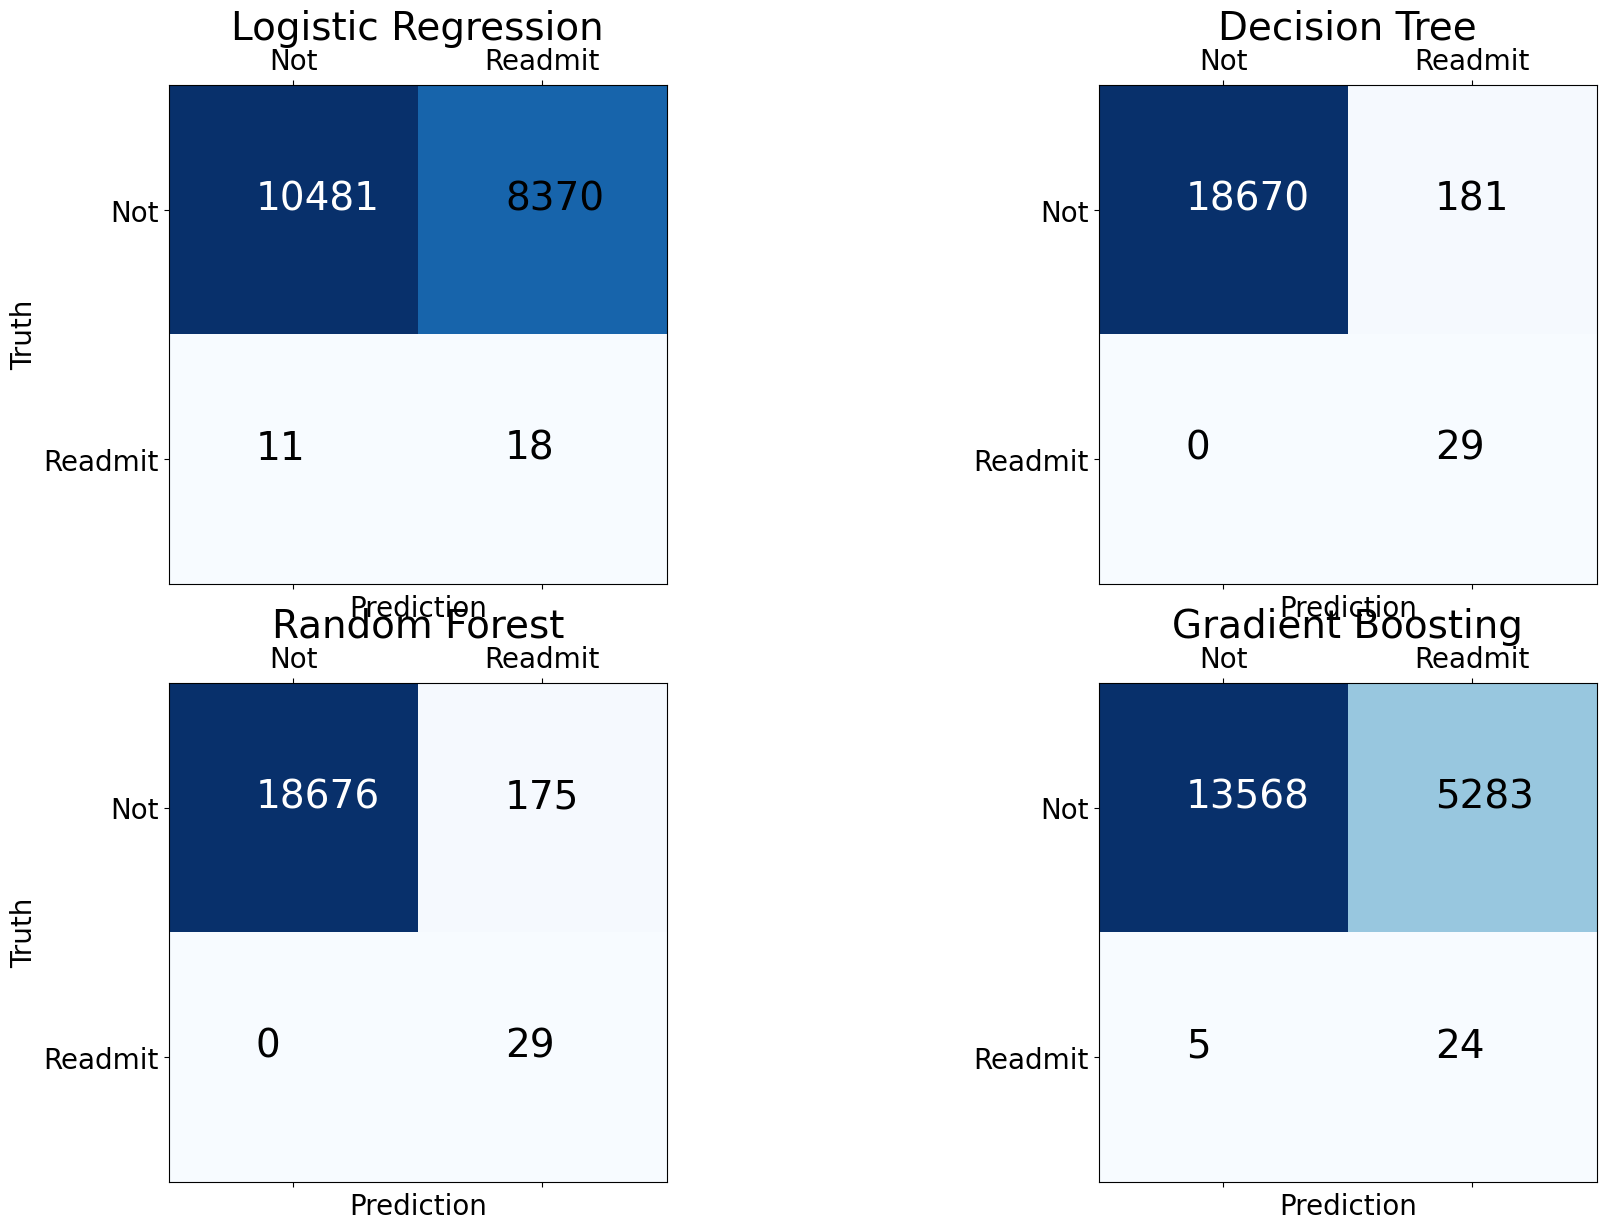

In [10]:
# Visualize confusion matrices
clf_names = list(classifiers.keys())
conf_mat_list = [confusion_matrices[name] for name in clf_names]

fig = plt.figure(figsize=(22, 22))
for i in range(1, len(conf_mat_list) + 1):
    ax = fig.add_subplot(3, 2, i)
    draw_conf_mat(conf_mat_list[i - 1], clf_names[i - 1], ax)
    if i != 1 and i != 3:
        ax.set_ylabel('')

plt.show()

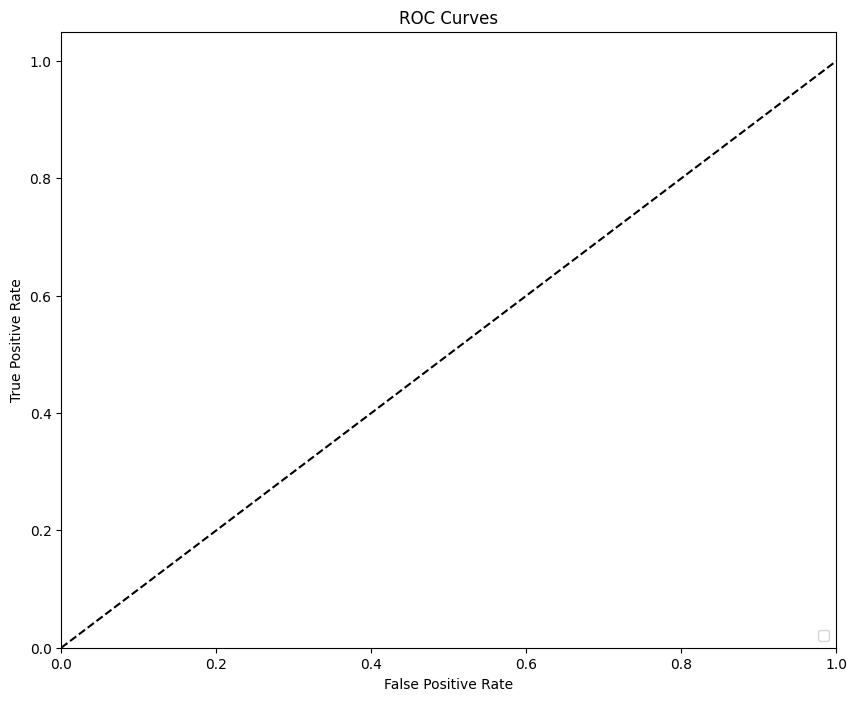

In [11]:
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

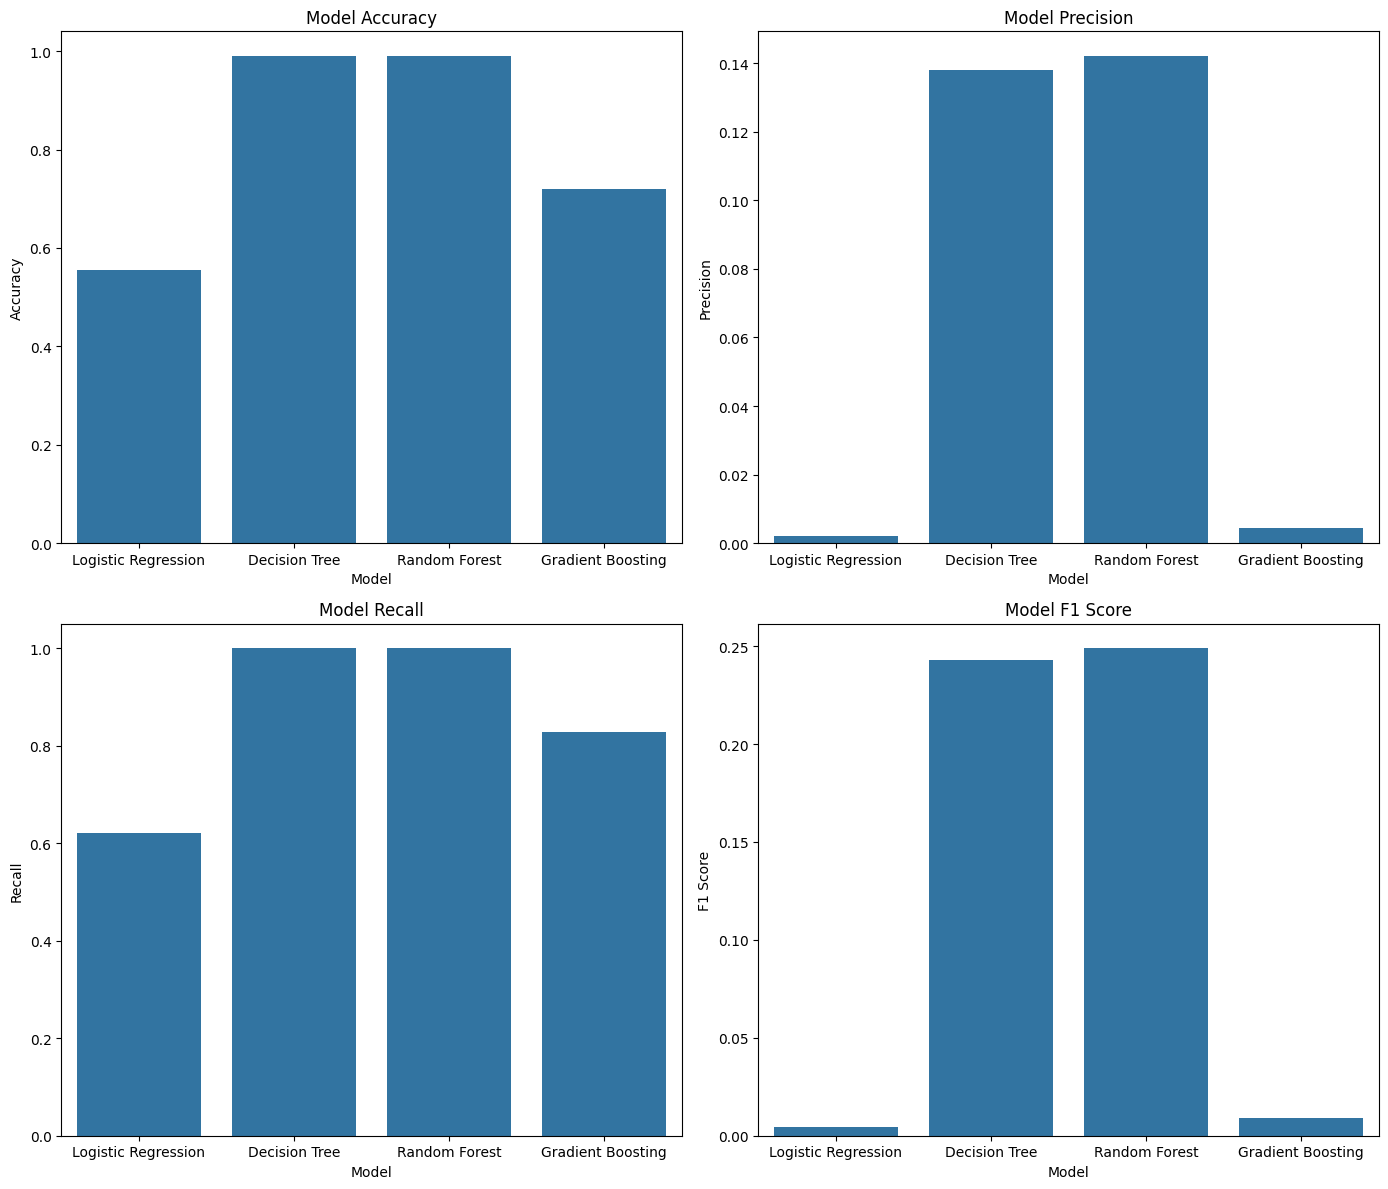

In [12]:
#Bar plot for each metric
metrics_df = pd.DataFrame(results).T.reset_index()
metrics_df = metrics_df.rename(columns={'index': 'Model'})

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0, 0])
axes[0, 0].set_title('Model Accuracy')
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0, 1])
axes[0, 1].set_title('Model Precision')
sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[1, 0])
axes[1, 0].set_title('Model Recall')
sns.barplot(x='Model', y='F1 Score', data=metrics_df, ax=axes[1, 1])
axes[1, 1].set_title('Model F1 Score')
plt.tight_layout()
plt.show()

In [13]:
# Instantiate and train the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_ros_scaled, y_train_ros)

# Make predictions
y_pred = rfc.predict(X_test_scaled)
y_pred_proba = rfc.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

In [14]:
# Print metrics
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Confusion Matrix:\n{conf_mat}")

Accuracy: 0.9907
Precision: 0.1422
Recall: 1.0000
F1 Score: 0.2489
ROC AUC Score: 0.9963
Confusion Matrix:
[[18676   175]
 [    0    29]]


In [15]:
import pickle
pickle.dump(rfc, open('model.pkl', 'wb'))

In [16]:
pickle.load(open('model.pkl', 'rb'))

RandomForestClassifier(random_state=42)

In [18]:
import pickle
import pandas as pd

def predict_readmission_rf(age, ethnicity, marital_status, admit_time, discharge_time, admission_type, gender):
    # Load the pre-trained model
    with open('model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)

    # Calculate length of stay
    length_of_stay = (pd.to_datetime(discharge_time) - pd.to_datetime(admit_time)).days

    # Create a dataframe with the input data
    input_data = pd.DataFrame({
        'age': [age],
        'length_of_stay': [length_of_stay],
        'admission_type': [admission_type],
        'gender': [gender],
        'ethnicity': [ethnicity],
        'marital_status': [marital_status]
    })

    # Encode categorical variables
    input_data = pd.get_dummies(input_data, drop_first=True)

    # Ensure the input data has the same columns as the training data
    input_data = input_data.reindex(columns=X.columns, fill_value=0)

    # Predict the readmission probability
    readmit_proba = model.predict_proba(input_data)[:, 1]

    # Define a threshold probability for prediction
    threshold = 0.5

    # Predict binary outcome based on threshold
    if readmit_proba >= threshold:
        return "yes"
    else:
        return "no"

def main():
    print("Welcome to the Readmission Predictor")
    print("Please answer the following questions with 'yes' or 'no':")

    age = int(input("Enter the patient's age: "))
    ethnicity = input("Enter the patient's ethnicity: ").strip().upper()
    marital_status = input("Enter the patient's marital status: ").strip().upper()
    admit_time = input("Enter the admission time (YYYY-MM-DD HH:MM:SS): ")
    discharge_time = input("Enter the discharge time (YYYY-MM-DD HH:MM:SS): ")
    admission_type = input("Enter the admission type (EMERGENCY, ELECTIVE, etc.): ").strip().upper()
    gender = input("Enter the patient's gender (M or F): ").strip().upper()

    readmit_prediction = predict_readmission_rf(age, ethnicity, marital_status, admit_time, discharge_time, admission_type, gender)

    print(f'\nPrediction: Patient needs to be readmitted? {readmit_prediction.capitalize()}')

if __name__ == "__main__":
    main()


Welcome to the Readmission Predictor
Please answer the following questions with 'yes' or 'no':
Enter the patient's age: 65
Enter the patient's ethnicity: WHITE
Enter the patient's marital status: MARRIED
Enter the admission time (YYYY-MM-DD HH:MM:SS): 2023-07-01 10:00:00
Enter the discharge time (YYYY-MM-DD HH:MM:SS): 2023-07-05 12:00:00
Enter the admission type (EMERGENCY, ELECTIVE, etc.): EMERGENCY
Enter the patient's gender (M or F): F

Prediction: Patient needs to be readmitted? No
